In [1]:
import os
import numpy as np
import datetime as DT

import matplotlib.pyplot as plt
import pandas as pd
pd.set_option('display.max_row', 10)

pd.set_option('expand_frame_repr', False)
pd.set_option('max_colwidth', 60)

## Set train data root path
root_path = os.path.abspath(os.path.join(os.path.dirname('__file__'), '../..'))

In [2]:
df = pd.read_csv(root_path+'/ipython/dataset/twitter/'+'tweetsclean_weekly_2.csv',\
                 dtype={'tweet_id':'str','tweet_inreplytouserid':'str',\
                        'tweet_inreplytostatusid':'str','tweet_source':'str',\
                        'name':'str'})

#http://stackoverflow.com/questions/24082784/pandas-dataframe-groupby-datetime-month
df['tweet_createdat'] = pd.to_datetime(df['tweet_createdat'], errors='coerce')
df["name"] = df["name"].map(str).map(str.strip)

## Clear all NaN Value, so become more readable
df = df.replace(np.nan, 'N-A', regex=True)

df

,name,location,followerscount,statusescount,friendscount,tweet_id,tweet_text,tweet_source,tweet_retweetcount,tweet_createdat,tweet_coordinate,tweet_geo,tweet_favorited,tweet_lang,tweet_inreplytouserid,tweet_inreplytostatusid,user_id,sentiment,is_spellchecked,tweet_favoritedcount
0,Preman Timeline,"Tabalong, Kal-Sel, Indonesia",6596,72149,222,842505483256643584,cinta itu indah jika ada saling percaya didalamnya,twittbot.net,0,2017-03-16 22:38:54,N-A,N-A,0,in,N-A,N-A,597086794,positive,f,N-A
1,Dinni Septii,"Indramayu, Indonesia",31,1099,90,842184401081442304,Cinta itu indah Jika bagi mu tidak mungkin karena salah ...,Twitter for Android,0,2017-03-16 01:23:02,N-A,N-A,0,in,N-A,N-A,749172715785859078,positive,f,N-A
2,Maria Angelina,N-A,20,12440,40,842325900003758080,Cinta itu indah jika yang kau cintai bersedia menanggung...,twittbot.net,0,2017-03-16 10:45:18,N-A,N-A,0,in,N-A,N-A,2276149208,neutral,f,N-A
3,Okto Rinaldo,oktorinaldo@outlook.com,1823,104360,704,842280224519667712,Cinta itu indah Minke juga kebinasaan yang mungkin membu...,Twitter Web Client,0,2017-03-16 07:43:48,N-A,N-A,0,in,N-A,N-A,166515525,positive,f,N-A
4,real,N-A,740,71607,503,842318002032844800,cinta itu indah tapi indah itu belum tentu cinta,twittbot.net,0,2017-03-16 10:13:55,N-A,N-A,0,in,N-A,N-A,251481899,neutral,f,N-A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2751914,♕♕Pangeran Kodok♕ ♕,Harapan indah bekasi,520,110353,93,842453540593266688,Cinta itu hadir karna perkenalan bersemi karna perhatian...,twittbot.net,0,2017-03-16 19:12:30,N-A,N-A,0,in,N-A,N-A,398450980,positive,f,N-A
2751915,Apriandhanii,N-A,605,54680,93,842490395904753664,Cinta itu hadir tanpa ada pakasaan namun cinta itu hadir...,twittbot.net,0,2017-03-16 21:38:57,N-A,N-A,0,in,N-A,N-A,1349271816,positive,f,N-A
2751916,Rosita U K Putuyana,N-A,326,1529,204,842250641900675073,cinta itu hal indah sekaligus seram indah untuknya yang ...,Mobile Web (M2),0,2017-03-16 05:46:15,N-A,N-A,0,in,N-A,N-A,2606225683,positive,f,N-A
2751917,Nuraini,"Yogyakarta, Indonesia",125,2813,53,842255998102339584,Cinta itu hany perlu dterima dnikmati mski ia hany rsa y...,Twitter for Android,0,2017-03-16 06:07:32,N-A,N-A,0,in,N-A,N-A,349997681,neutral,f,N-A


In [3]:
#http://stackoverflow.com/questions/21343401/counting-observations-after-grouping-by-dates-in-pandas
#http://stackoverflow.com/questions/19384532/how-to-count-number-of-rows-in-a-group-in-pandas-group-by-object
from collections import Counter
counted_dates = Counter(df['tweet_createdat'].apply(lambda x: x.date()))

counted_series = pd.Series(counted_dates)
counted_series.index = pd.to_datetime(counted_series.index)

counted_series = counted_series.to_frame()
counted_series.index.names = ['date']
counted_series.reset_index(inplace=True)
counted_series = counted_series.rename(columns= {0: 'tweet_count'})

counted_series

,date,tweet_count
0,2017-03-09,465912
1,2017-03-10,372687
2,2017-03-11,459379
3,2017-03-15,454202
4,2017-03-16,537505
5,2017-03-17,462234


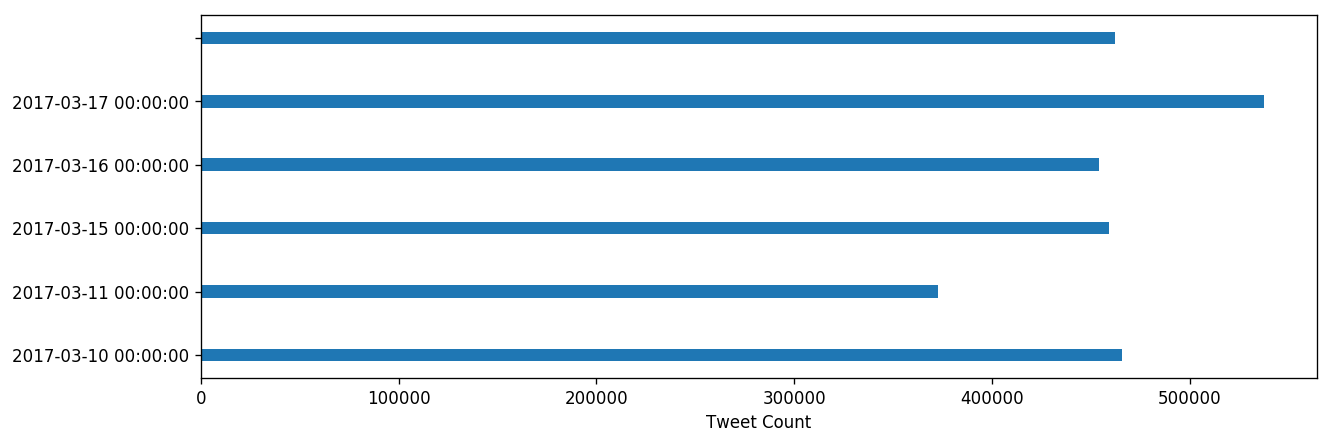

In [4]:
#counted_series.set_index('date', inplace=True)
#counted_series.resample('12H')
#counted_series.plot(kind='barh')
#http://stackoverflow.com/questions/27823273/counting-frequency-of-values-by-date-using-pandas
#http://stackoverflow.com/questions/15201386/how-to-plot-multiple-horizontal-bars-in-one-chart-with-matplotlib
#http://stackoverflow.com/questions/9626298/matplotlib-chart-creating-horizontal-bar-chart
fig = plt.figure(figsize=(12,4), dpi=120)
ax  = fig.add_subplot(111)

ax.barh(range(len(counted_series.date)), counted_series.tweet_count, 0.2)
ax.set_yticklabels(counted_series.date)

#http://stackoverflow.com/questions/6963035/pyplot-axes-labels-for-subplots
plt.xlabel('Tweet Count')
plt.show()

In [5]:
#http://stackoverflow.com/questions/16266019/python-pandas-group-datetime-column-into-hour-and-minute-aggregations
#http://stackoverflow.com/questions/16967165/getting-the-average-of-a-certain-hour-on-weekdays-over-several-years-in-a-pandas
#https://chrisalbon.com/python/pandas_group_data_by_time.html
grp = df[['tweet_createdat']].groupby(by=[df.tweet_createdat.map(lambda x : x.day),\
                                         df.tweet_createdat.map(lambda x: x.hour)],\
                                      as_index=False).size().to_frame()

#https://chrisalbon.com/python/pandas_apply_operations_to_groups.html
#http://stackoverflow.com/questions/20110170/turn-pandas-multi-index-into-column
#http://stackoverflow.com/questions/20461165/how-to-convert-pandas-index-in-a-dataframe-to-a-column
#http://stackoverflow.com/questions/19851005/rename-pandas-dataframe-index
#http://stackoverflow.com/questions/26097916/python-best-way-to-convert-a-pandas-series-into-a-pandas-dataframe
grp.index.names = ['day','hour']
grp.reset_index(inplace=True)
grp = grp.rename(columns= {0: 'tweet_count'})

# Sample of day-N
print grp.groupby(['day']).count()

     hour  tweet_count
day                   
9      24           24
10     24           24
11     17           17
15     23           23
16     24           24
17     24           24


In [10]:
days_to_view = [9,10,11,15,16,17]
grpf=[]
for datedays in days_to_view:
    grpf.append(grp.loc[(grp['day']==datedays)])

grpf[1].min

<bound method DataFrame.min of     day  hour  tweet_count
24   10     0        28079
25   10     1         5039
26   10     2         2945
27   10     3         2688
28   10     4         3001
..  ...   ...          ...
43   10    19        12141
44   10    20         9271
45   10    21         9022
46   10    22        12471
47   10    23        19154

[24 rows x 3 columns]>

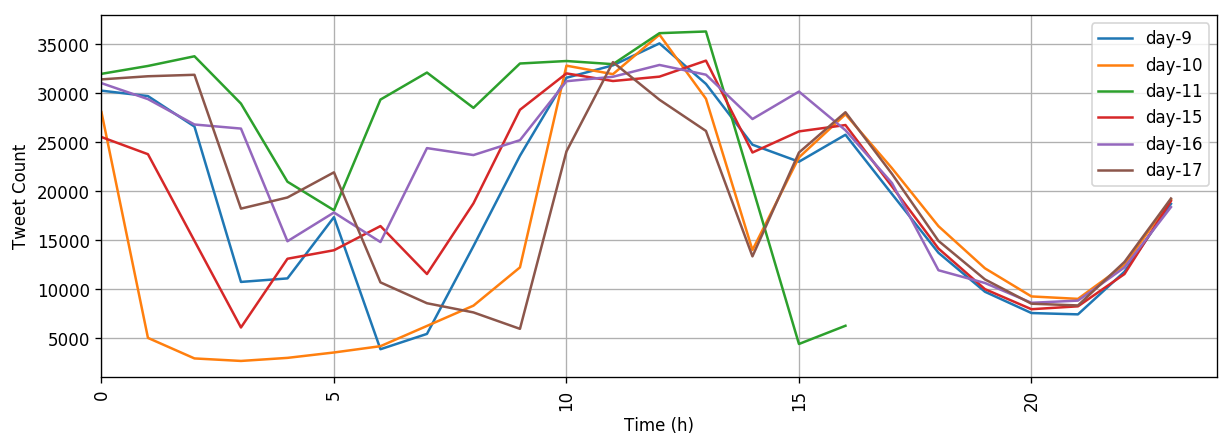

In [20]:
# make your plot
fig = plt.figure( figsize=(12,4), dpi=120 )
ax  = fig.add_subplot(111)

lns=[]
for i,datedays in enumerate(days_to_view):
    # added these three lines
    lns+=ax.plot(grpf[i].hour, grpf[i].tweet_count,'-',label = 'day-'+str(datedays))
    
labs = [l.get_label() for l in lns]
ax.legend(lns, labs, loc=0)

ax.grid()
ax.set_xlabel("Time (h)")
ax.set_ylabel(r"Tweet Count")

ax.set_xlim([0, 24])

plt.xticks(rotation=90)
plt.show()

In [30]:
#http://machinelearningmastery.com/quick-and-dirty-data-analysis-with-pandas/
#http://www.dummies.com/education/math/statistics/what-a-boxplot-can-tell-you-about-a-statistical-data-set/
#http://www.physics.csbsju.edu/stats/box2.html
#http://www.wellbeingatschool.org.nz/information-sheet/understanding-and-interpreting-box-plots
#http://stattrek.com/statistics/charts/boxplot.aspx?Tutorial=AP

df_location_unique = df[['tweet_id','location']].loc[(df['location']!='n-a') & (df['location']!='')].groupby(['tweet_id','location']).size().to_frame()

df_location_unique.index.names=['tweet_id','location']
df_location_unique.reset_index(inplace=True)
df_location_unique = df_location_unique.rename(columns={0: 'count'})

print df_location_unique['location'].describe(),"\n"
print df_location_unique.groupby('location').size()

count       1999550
unique       175482
top       indonesia
freq         160721
Name: location, dtype: object 

location
!                         1
! am a geographer         2
! dream world of msg !    1
! gulde + rÜeヾ            3
! johorean !              1
                         ..
🥃                        3
🥋🦋                      1
🦁                        4
🦄                        2
🦄🌈                      1
dtype: int64


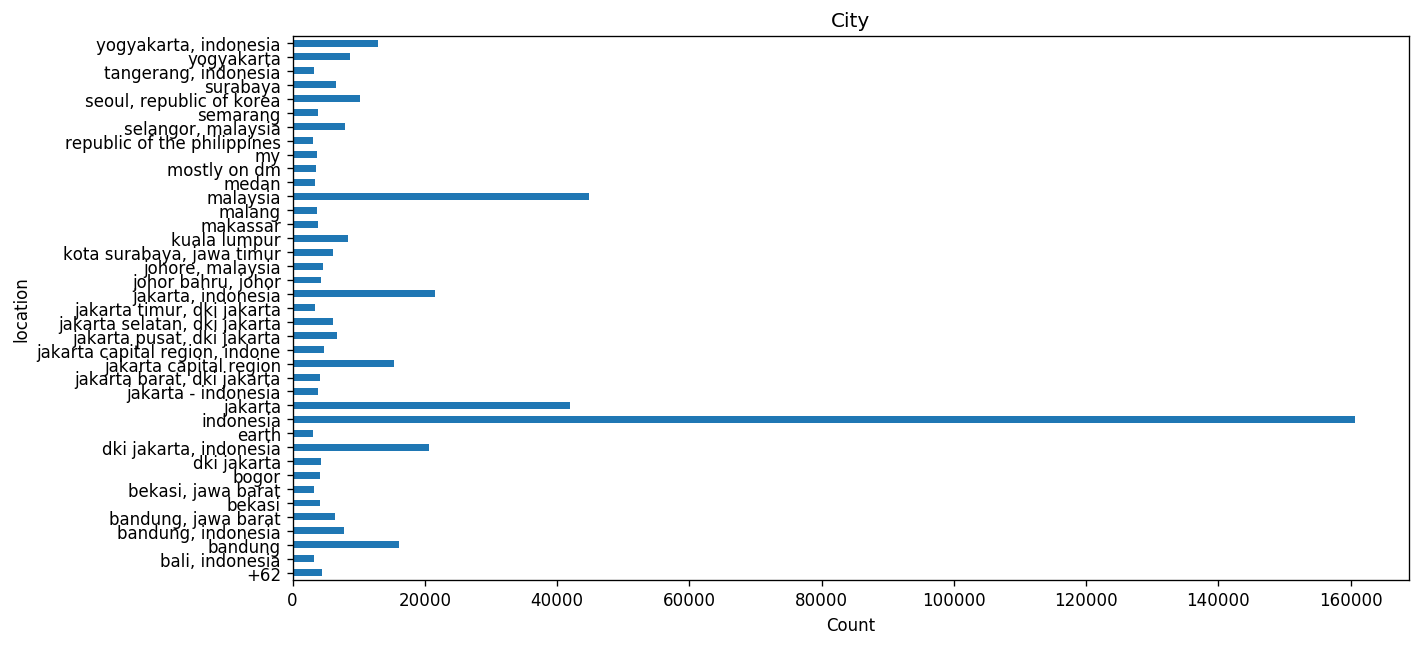

In [32]:
# filter tweet location that only has count that greater locn
fig3, ax3 = plt.subplots(figsize=(12,6), dpi=120)

locn=3000
locfilter = df_location_unique[['location']].groupby(['location']).filter(lambda x: len(x) > locn)

locfilter.groupby(['location']).size().plot(kind='barh', stacked=True, title="City", ax=ax3)
plt.xlabel('Count')
plt.show()

**Box plots** are used to **show overall patterns of response** for a group.

They provide a useful way to **visualise the range and other characteristics of responses** for a *large* group.

C:\Users\drr3ds\Anaconda2\lib\site-packages\ipykernel\__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


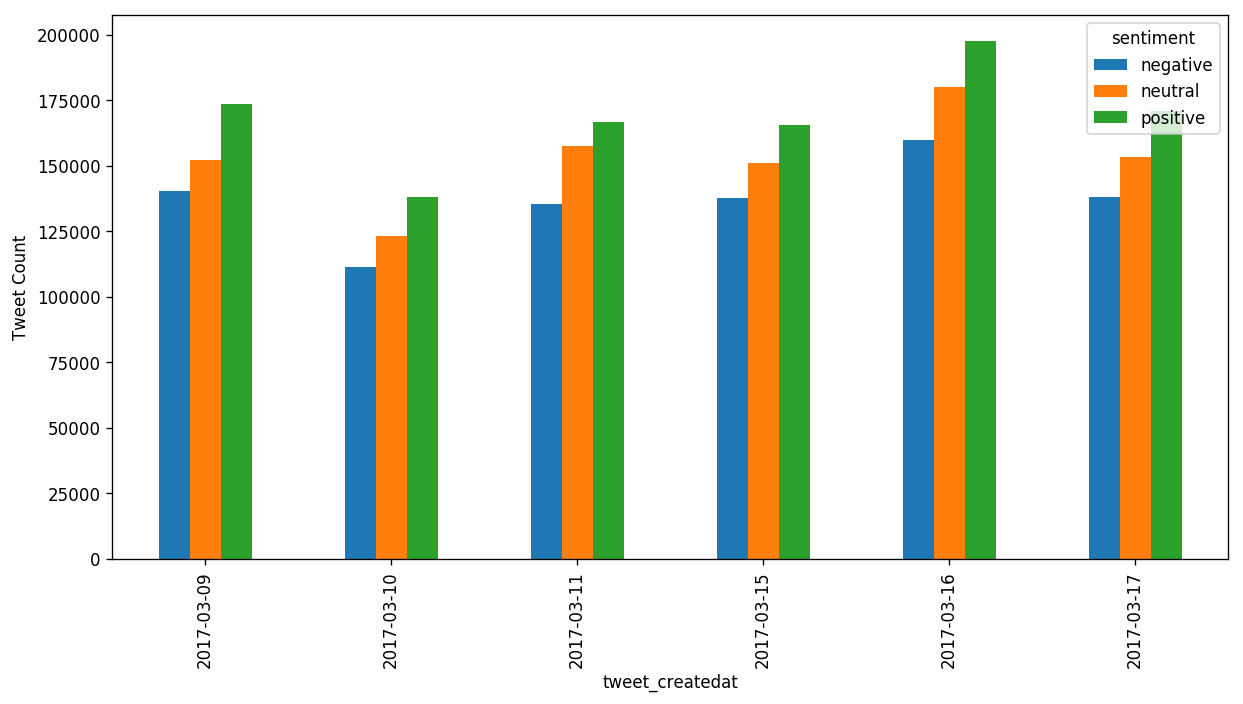

In [33]:
#http://stackoverflow.com/questions/22483588/how-can-i-plot-separate-pandas-dataframes-as-subplots
#http://stackoverflow.com/questions/7986567/matplotlib-how-to-set-the-current-figure
figsent = plt.figure( figsize=(12,6), dpi=120 )

#http://stackoverflow.com/questions/3584805/in-matplotlib-what-does-the-argument-mean-in-fig-add-subplot111
#http://stackoverflow.com/questions/34162443/why-do-many-examples-use-fig-ax-plt-subplots-in-matplotlib-pyplot-python
axsent  = figsent.add_subplot(111)

dfsentiment_perday = df[['tweet_id','sentiment','tweet_createdat']]
dfsentiment_perday['tweet_createdat']=dfsentiment_perday['tweet_createdat'].apply(lambda x: x.date())

sctsentiment_perday = dfsentiment_perday.pivot_table(values='tweet_id', index='tweet_createdat', columns='sentiment', \
                                                     aggfunc=lambda x: len(x.unique())).replace(np.nan,0)

sctsentiment_perday.plot(kind='bar', stacked=False, ax=axsent)
plt.ylabel(r"Tweet Count")
plt.show()